<a href="https://colab.research.google.com/github/nikodemard/DataMining_Klasifikasi_Naive_Bayes_Python/blob/main/TugasDM_Klasifikasi_Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_excel("Ciri_jamur.xlsx")
x = dataset.iloc[:, [0,2]].values
y = dataset.iloc[:, -1].values

Karna tipe data saya berupa string, maka saya mengencoding label dan data kedalam tipe float

In [ ]:
#Encoding Data
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
x[:, 0] = labelencoder.fit_transform(x[:, 0])
x[:, 1] = labelencoder.fit_transform(x[:, 1])

In [ ]:
#Encoding Label
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
print(x)

[[1 3]
 [1 5]
 [4 8]
 ...
 [2 3]
 [5 3]
 [1 3]]


In [ ]:
print(y)

[0 1 1 ... 1 0 1]


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [ ]:
print(x_train)

[[2 5]
 [1 3]
 [2 0]
 ...
 [1 0]
 [2 3]
 [1 0]]


In [ ]:
print(x_test)

[[1 3]
 [2 0]
 [1 5]
 ...
 [1 6]
 [1 5]
 [5 3]]


In [ ]:
print(y_train)

[0 1 1 ... 1 1 1]


In [ ]:
print(y_test)

[0 1 1 ... 0 1 1]


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
print(x_train)

[[ 0.03586506  0.45291587]
 [-0.75589516 -0.29212095]
 [ 0.03586506 -1.40967619]
 ...
 [-0.75589516 -1.40967619]
 [ 0.03586506 -0.29212095]
 [-0.75589516 -1.40967619]]


In [ ]:
print(x_test)

[[-0.75589516 -0.29212095]
 [ 0.03586506 -1.40967619]
 [-0.75589516  0.45291587]
 ...
 [-0.75589516  0.82543428]
 [-0.75589516  0.45291587]
 [ 2.41114571 -0.29212095]]


In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

In [ ]:
y_pred = classifier.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[168 802]
 [171 890]]


<ipython-input-82-08460d0804bc>:14: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


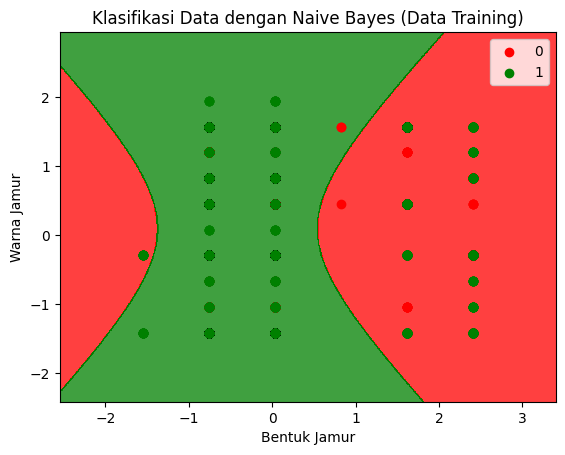

In [82]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min()-1, stop = x_set[:, 0].max() + 1, step=0.01),
                     np.arange(start = x_set[:, 1].min()-1, stop = x_set[:, 1].max() + 1, step=0.01))

Z = classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape)
Z = np.nan_to_num(Z)

plt.contourf(x1,x2, Z,
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate (np.unique(y_set)):
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
              c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Klasifikasi Data dengan Naive Bayes (Data Training)')
plt.xlabel('Bentuk Jamur')
plt.ylabel('Warna Jamur')
plt.legend()
plt.show()

<ipython-input-81-363fe6253053>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


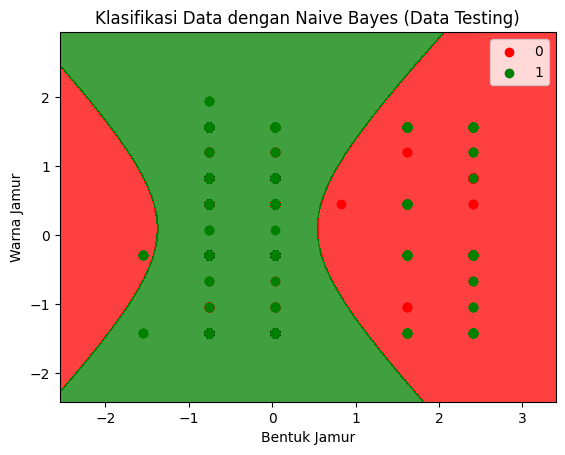

In [81]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_test, y_test
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min()-1, stop = x_set[:, 0].max() + 1, step=0.01),
                     np.arange(start = x_set[:, 1].min()-1, stop = x_set[:, 1].max() + 1, step=0.01))
plt.contourf(x1,x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate (np.unique(y_set)):
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
              c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Klasifikasi Data dengan Naive Bayes (Data Testing)')
plt.xlabel('Bentuk Jamur')
plt.ylabel('Warna Jamur')
plt.legend()
plt.show()